## Week4 - Lab
Take a look at this toy dataset. Perform the following operations

1. Train-test split
2. Train a linear regression model
3. Evaluate/create residual plots
4. Explain findings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_1.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_2.csv')

In [2]:
data1

,Unnamed: 0,X,y
0,0,50,147
1,1,82,246
2,2,66,207
3,3,35,105
4,4,81,240
...,...,...,...
95,95,98,285
96,96,9,18
97,97,56,174
98,98,50,159


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
data1.columns

Index(['Unnamed: 0', 'X', 'y'], dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1[['Unnamed: 0', 'X']], data1['y'], test_size=0.20, random_state=42)

In [6]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = regressor.predict(X_test)
y_pred

array([268.70801742,  91.65643431,  58.47000235,  19.60255557,
       250.9841101 ,  13.6398044 ,  25.79226104, 238.68295928,
       122.0414889 , 149.16343156, 124.98373444, 154.93835849,
        43.42225623, 154.91488046,  19.25038513, 242.28258965,
        70.44246076, 160.58024326,  94.98215433, 151.92567887])

## mean squared error

In [8]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

82.30414065338745

## root mean squared error

In [9]:
rmse = np.sqrt(mse)
rmse

9.072162953418962

## R^2 Score

In [10]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.9872071952171014

## Plot the test and predictions

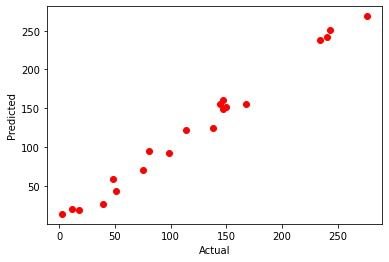

In [11]:
import matplotlib.pyplot as plt

plt.plot(y_test, y_pred, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Evaluate/create residual plots

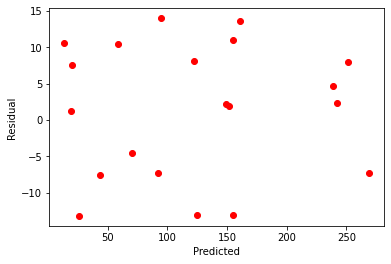

In [12]:
plt.plot(y_pred, y_pred - y_test, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()

As the points are scattered and away from the residual line = 0, Appropriate linear model: when plots are randomly placed, above and below x-axis (y = 0).They are not possesing any pattern like U shaped or Inverted U shape.

**Random, No Pattern
"Linear Appropriate"**

In [13]:
data2

,Unnamed: 0,X1,X2,y
0,0,50,B,2510
1,1,82,B,6738
2,2,66,B,4355
3,3,35,A,2225
4,4,81,A,7560
...,...,...,...,...
95,95,98,B,9615
96,96,9,A,1066
97,97,56,A,4139
98,98,50,B,2502


In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    int64 
 1   X1          100 non-null    int64 
 2   X2          100 non-null    object
 3   y           100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [29]:
y = data2['y']

In [30]:
y

0     2510
1     6738
2     4355
3     2225
4     7560
      ... 
95    9615
96    1066
97    4139
98    2502
99    3815
Name: y, Length: 100, dtype: int64

In [16]:
features = data2[['Unnamed: 0','X1','X2']]

In [17]:
X = features

In [18]:
X

,Unnamed: 0,X1,X2
0,0,50,B
1,1,82,B
2,2,66,B
3,3,35,A
4,4,81,A
...,...,...,...
95,95,98,B
96,96,9,A
97,97,56,A
98,98,50,B


In [19]:
from sklearn.model_selection import train_test_split

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 80
Test samples: 20


In [20]:
X_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 25 to 30
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  80 non-null     int64 
 1   X1          80 non-null     int64 
 2   X2          80 non-null     object
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_vars = ['X2']
num_vars = ['X1']

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars),
                                                      ('create_dummies', cat_pipeline, cat_vars)])

print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['X1']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['X2'])])


In [32]:
from sklearn.linear_model import LinearRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])
modeling_pipeline.fit(X_training, y_training)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['X1']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])

In [33]:
y_pred1 = modeling_pipeline.predict(X_test)


In [34]:
y_pred1

array([1402.11813565,  635.16167337, 5900.37258961, 3434.30480507,
       6574.95693055, 1494.49025698, 4052.93016286, 5715.62834694,
       7563.07077369, 3249.5605624 , 2390.23197879,  450.4174307 ,
        265.67318802,  542.78955203, 2852.09258547,  265.67318802,
       7036.81753724, 1679.23449966, 5189.37511049, 4330.04652687])

## mean squared error

In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred1)
mse

494741.8898861472

## root mean squared error

In [36]:
rmse = np.sqrt(mse)
rmse

703.3789091849053

## R^2 Score

In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred1)
r2

0.9243504737090023

## Plot the test and predictions

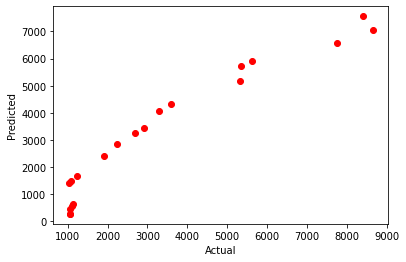

In [40]:
import matplotlib.pyplot as plt

plt.plot(y_test, y_pred1, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

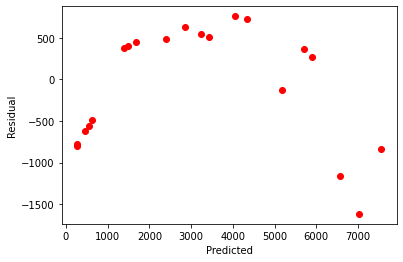

In [41]:
plt.plot(y_pred1, y_pred1 - y_test, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()

As the points are scattered and away from the residual line = 0, Appropriate linear model: when plots are randomly placed, above and below x-axis (y = 0).They are not possesing any pattern like U shaped or Inverted U shape.

**Random, No Pattern "Linear Appropriate"**